# Pandas

* Jake VanderPlas. 2016. *Python Data Science Handbook: Essential Tools for Working with Data*. O'Reilly Media, Inc.
* Chapter 3 - Data Manipulation with Pandas
* https://github.com/jakevdp/PythonDataScienceHandbook

Pandas provides:

* Rich I/O Capabilities (read/write data from/to CSV, Excel, SQL, JSON, etc.)
* 1-dimensional (**Series**) and 2-dimensional tabular (**DataFrame**) data structures.
* Data flexibility (handles missing data, time series, and heterogeneous data types).
* Labeled Rows and columns for data alignment
* Flexible indexing, slicing, fancy indexing, and subsetting of large datasets.

In [1]:
import numpy as np
import pandas as pd

pd.__version__

'2.2.3'

In [2]:
# type TAB to get the numpy namespace
#pd.

In [3]:
def pprint(*args, sep='\n', end='\n', userepr=True, align=False, breakline=False, indent='   '):
    "Evaluate and pretty print"
    if align :
        max_arg_len = max(map(len,args))
        txt2txt = lambda txt : ' '*(max_arg_len-len(txt)) + txt
        args = list(map(txt2txt, args))
    geval = lambda txt : eval(txt, globals())
    txt2txt = lambda txt : f'{repr(geval(txt))}' if userepr else f'{geval(txt)}'    
    output = map(txt2txt, args)
    txt2txt = lambda txt : f'{txt} = '    
    prefix = map(txt2txt, args)
    if breakline :
        po2txt = lambda p,o : (p+'\n'+o).replace('\n','\n'+indent)
    else:
        po2txt = lambda p,o : (p+o).replace('\n','\n'+' '*len(p))
    print(*map(po2txt, prefix, output), sep=sep, end=end)

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Pandas Series

* One-dimensional array of indexed data
* Two key attributes:
   * `values` : NumPy array
   * `index` : an array-like object of type `pd.Index`

In [4]:
d = pd.Series([0.25, 0.5, 0.75, 1.0])
pprint('d', 'd.values', 'd.index', align=True)

       d = 0    0.25
           1    0.50
           2    0.75
           3    1.00
           dtype: float64
d.values = array([0.25, 0.5 , 0.75, 1.  ])
 d.index = RangeIndex(start=0, stop=4, step=1)


In [5]:
d = pd.Series([0.25, 0.5, 0.75, 1.0])
pprint('d', 'd.values', 'd.index', align=True)

       d = 0    0.25
           1    0.50
           2    0.75
           3    1.00
           dtype: float64
d.values = array([0.25, 0.5 , 0.75, 1.  ])
 d.index = RangeIndex(start=0, stop=4, step=1)


Series can be created from NumPy arrays:

In [6]:
d = pd.Series(np.linspace(0,4,6))
d

0    0.0
1    0.8
2    1.6
3    2.4
4    3.2
5    4.0
dtype: float64

A series can be indexed just like a NumPy array:

In [7]:
d = pd.Series(np.arange(10,15))
pprint('d[3]')  # simple index --> scalar
pprint('d[3:]', 'd[3:4]')  # slice --> series
pprint('d[[1,3,0]]', 'd[[1]]')  # fancy index --> series

d[3] = 13
d[3:] = 3    13
        4    14
        dtype: int64
d[3:4] = 3    13
         dtype: int64
d[[1,3,0]] = 1    11
             3    13
             0    10
             dtype: int64
d[[1]] = 1    11
         dtype: int64


But... Pandas Series can have an **explicit index**
   * If not provided, an **implicit int index** is used `[0,1,...,n-1]`

In [8]:
d = pd.Series(np.arange(10,15), index=["a","b","c","d","e"])
pprint('d')
# WARNING "treating keys as positions is deprecated"  --> use Series.iloc[pos]
#pprint('d[1]')
pprint('d["b"]')

d = a    10
    b    11
    c    12
    d    13
    e    14
    dtype: int64
d["b"] = 11


### Slicing - Case 1 - non-integer explicit index
   * Both non-integer (explicit) and integer (implicit) slices can be used.
   * non-integer slice &rarr; **label-based indexing** &rarr; $[from,to]$
   * integer slice &rarr; **position-based indexing** &rarr; $[from,to)$

<br>

In [9]:
d = pd.Series([100,101,102,103,104], index=["a","b","c","d","e"])
pprint('d')
pprint('d["a"]', 'd["c"]', 'd["a":"c"].values')   # explicit index
pprint('d[0:2].values')                           # implicit index

d = a    100
    b    101
    c    102
    d    103
    e    104
    dtype: int64
d["a"] = 100
d["c"] = 102
d["a":"c"].values = array([100, 101, 102])
d[0:2].values = array([100, 101])


### Slicing - Case 2 - integer explicit index
   * Slicing is <u>always referred to implicit indexes</u>.
   * integer slice &rarr; **position-based indexing** &rarr; $[from,to)$

<br>

In [10]:
d = pd.Series([100,101,102,103,104], index=[1,5,4,2,3])
pprint('d')
pprint('d[1]', 'd[3]')  # explicit index
pprint('d[1:3].values') # implicit index

d = 1    100
    5    101
    4    102
    2    103
    3    104
    dtype: int64
d[1] = 100
d[3] = 104
d[1:3].values = array([101, 102])


### Fancy Indexing
   * Label-based indexing
   * Using position-based indexing is deprecated 

<br>

In [11]:
d = pd.Series([100,101,102,103,104], index=["a","b","c","d","e"])
pprint('d[["a","b","c"]].values')   # implicit index
# WARNING "treating keys as positions is deprecated"  --> use Series.iloc[pos]
#pprint('d[[1,2,3]].values')   # implicit index

d = pd.Series([100,101,102,103,104], index=[1,5,4,2,3])
pprint('d[[1,2,3]].values')   # explicit index

d[["a","b","c"]].values = array([100, 101, 102])
d[[1,2,3]].values = array([100, 103, 104])


### Series and dictionaries
* Series are kind of specialized Python dictionaries $\{index_{typed \,\&\, ordered} \to value_{typed}\}$ 
* `pd.Series(dict)` &rarr; create a Series from a dictionary
* `pd.Series.to_dict()` &rarr; create a dictionary from a Series<br><br>

In [12]:
d1 = pd.Series([100,101,102], index=["a","b","c"])
x = d1.to_dict()
d2 = pd.Series(x)
pprint('d1','x','d2')

d1 = a    100
     b    101
     c    102
     dtype: int64
x = {'a': 100, 'b': 101, 'c': 102}
d2 = a    100
     b    101
     c    102
     dtype: int64


* `.keys()` &rarr; `.index` <br><br>

In [13]:
d = pd.Series([100,101,102,103,104], index=["a","b","c","d","e"])
pprint('type(d.index) == type(d.keys())')
pprint('d.index == d.keys()')
pprint('d.index is d.keys()')

type(d.index) == type(d.keys()) = True
d.index == d.keys() = array([ True,  True,  True,  True,  True])
d.index is d.keys() = True


 <br>
 
 * $\nexists\;\;$ `.values()`

* `.items()` &rarr; `zip` object of `(index,value)` <br><br>

In [14]:
d = pd.Series([100,101,102,103,104], index=["a","b","c","d","e"])
pprint('d.items()')
print(*d.items())


d.items() = <zip object at 0x7f3072d1c500>
('a', 100) ('b', 101) ('c', 102) ('d', 103) ('e', 104)


<br>

* `x in series` &rarr; checks if Series index contains `x`

In [15]:
d = pd.Series([100,101,102,103,104], index=["a","b","c","d","e"])
pprint('102 in d', '"xxx" in d')

102 in d = False
"xxx" in d = False


## Pandas DataFrame

* DataFrames are kind of specialized Python dictionaries $\{index_{typed \,\&\, ordered} \to series\}$ with a common row index
* Kind of *Series of Series* with a common row index
* * Three key attributes:
   * `values` : NumPy array
   * `index` and `columns`: array-like objects of type `pd.Index`

<br>

In [16]:
cities = ['California','Texas','Florida','New York']
population = pd.Series([39538223,29145505,21538187,20201249], index=cities)
area = pd.Series([423967, 695662, 170312, 141297], index=cities)
states = pd.DataFrame({'population':population, 'area':area})
states

,population,area
California,39538223,423967
Texas,29145505,695662
Florida,21538187,170312
New York,20201249,141297


* The `index` attribute (*row index*) and `columns` attribute (*column index*) are of type `pd.Index`
* The `values` attribute (of type `np.ndarray`) contains the data

<br>

In [17]:
states.index

Index(['California', 'Texas', 'Florida', 'New York'], dtype='object')

<br>

In [18]:
states.columns

Index(['population', 'area'], dtype='object')

<br>

In [19]:
states.values

array([[39538223,   423967],
       [29145505,   695662],
       [21538187,   170312],
       [20201249,   141297]])

A DataFrame can be constructed from a single series:<br><br>

In [20]:
cities = ['California','Texas','Florida','New York']
population = pd.Series([39538223,29145505,21538187,20201249], index=cities)
states = pd.DataFrame(population, columns=['population'])
states

,population
California,39538223
Texas,29145505
Florida,21538187
New York,20201249


A DataFrame can be constructed from a dictionary of Series:<br><br>

In [21]:
cities = ['California','Texas','Florida','New York']
population = pd.Series([39538223,29145505,21538187,20201249], index=cities)
area = pd.Series([423967, 695662, 170312, 141297], index=cities)
states = pd.DataFrame({'population':population, 'area':area})
states

,population,area
California,39538223,423967
Texas,29145505,695662
Florida,21538187,170312
New York,20201249,141297


A DataFrame can be constructed from list of dictionaries:<br><br>

In [22]:
data = [
    {'population':39538223, 'area':423967},
    {'population':29145505, 'area':695662},
    {'population':21538187, 'area':170312},
    {'population':20201249, 'area':141297}
]
states = pd.DataFrame(data, index=["California","Texas","Florida","New York"])
states

,population,area
California,39538223,423967
Texas,29145505,695662
Florida,21538187,170312
New York,20201249,141297


A DataFrame can be constructed from a two-dimensional NumPy array:<br><br>

In [23]:
data = np.array([[39538223,   423967],
          [29145505,   695662],
          [21538187,   170312],
          [20201249,   141297]])
states = pd.DataFrame(data,
                      columns=["population","area"],
                      index=["California","Texas","Florida","New York"])
states

,population,area
California,39538223,423967
Texas,29145505,695662
Florida,21538187,170312
New York,20201249,141297


A DataFrame can integrate indexes in different orders<br><br>

In [24]:
cities1 = ['California','Texas','Florida','New York']
population = pd.Series([39538223,29145505,21538187,20201249], index=cities1)
cities2 = ['Texas','Florida','New York','California']
area = pd.Series([695662, 170312, 141297, 423967], index=cities2)
states = pd.DataFrame({'population':population, 'area':area})
states

,population,area
California,39538223,423967
Florida,21538187,170312
New York,20201249,141297
Texas,29145505,695662


A DataFrame can integrate indexes with different values
* *Missing* values are filled with `NaN`s <br><br>

In [25]:
cities1 = ['California','Texas','Florida']
population = pd.Series([39538223,29145505,21538187], index=cities1)
cities2 = ['Texas','Florida','New York']
area = pd.Series([695662, 170312, 141297], index=cities2)
states = pd.DataFrame({'population':population, 'area':area})
states

,population,area
California,39538223.0,NaN
Florida,21538187.0,170312.0
New York,NaN,141297.0
Texas,29145505.0,695662.0


## Pandas Index
* Kind of Immutable NumPy array
* Many NumPy attributes, indexable, sliceable, etc. <br><br>

In [26]:
ind = pd.Index(['California', 'Texas', 'Florida'])
pprint('ind', 'ind[1]', 'ind[:2]', 'ind[[2,0,1]]', align=True, end='\n\n')
pprint('ind.size', 'ind.shape', 'ind.ndim', 'ind.dtype', align=True)

         ind = Index(['California', 'Texas', 'Florida'], dtype='object')
      ind[1] = 'Texas'
     ind[:2] = Index(['California', 'Texas'], dtype='object')
ind[[2,0,1]] = Index(['Florida', 'California', 'Texas'], dtype='object')

 ind.size = 3
ind.shape = (3,)
 ind.ndim = 1
ind.dtype = dtype('O')


In [27]:
ind = pd.Index([200, 1000, 300])
pprint('ind', 'ind[1]', 'ind[:2]', 'ind[[2,0,1]]', align=True, end='\n\n')
pprint('ind.size', 'ind.shape', 'ind.ndim', 'ind.dtype', align=True)

         ind = Index([200, 1000, 300], dtype='int64')
      ind[1] = 1000
     ind[:2] = Index([200, 1000], dtype='int64')
ind[[2,0,1]] = Index([300, 200, 1000], dtype='int64')

 ind.size = 3
ind.shape = (3,)
 ind.ndim = 1
ind.dtype = dtype('int64')


`pd.Index` follows many of the conventions of Python's `set`

* `idx1.union(idx2)` &rarr; combines elements from both Indexes
* `idx1.intersection(idx2)` &rarr; elements that are common to both Indexes
* `idx1.difference(idx2)` &rarr; elements in `idx1` that are not in `idx2`
* `idx1.symmetric_difference(idx2)` &rarr; elements in either, but not in both
* `idx1.equals(idx2)` &rarr; checks if they contain the same elements in the same order

<br>

In [28]:
idx1 = pd.Index([1,2,3,4,5])
idx2 = pd.Index([4,5,6,7])
pprint('idx1.union(idx2)', 'idx1.intersection(idx2)',
       'idx1.difference(idx2)', 'idx1.symmetric_difference(idx2)',
       'idx1.equals(idx2)', align=True)

               idx1.union(idx2) = Index([1, 2, 3, 4, 5, 6, 7], dtype='int64')
        idx1.intersection(idx2) = Index([4, 5], dtype='int64')
          idx1.difference(idx2) = Index([1, 2, 3], dtype='int64')
idx1.symmetric_difference(idx2) = Index([1, 2, 3, 6, 7], dtype='int64')
              idx1.equals(idx2) = False


## Pandas I/O
* Powerfull and flexible IO collection of functions
   * Text-based files: CSV, TSV, plain text
   * Spreadsheet files: Excel, OpenOffice/LibreOffice
   * Web-based data: HTML
   * Structured data formats: JSON, XML
   * Relational Databases: SQL
   * Other formats: Pickle, HDF5, Parquet, ...
* In (`pd.read_...`): `pd.read_csv`, `pd.read_excel`, `pd.read_json`,... `
* Out (`df.to_...`): `df.to_csv`, `df.to_excel`, `df.to_json`,... `


In [29]:
#pd.read_
#df.to_

In [30]:
url = "https://raw.githubusercontent.com/pandas-dev/pandas/refs/heads/main/pandas/tests/io/data/csv/iris.csv"
pd.read_csv(url)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [186]:
#!pip install openpyxl
url = "https://github.com/pandas-dev/pandas/raw/refs/heads/main/pandas/tests/io/data/excel/test1.xlsx"
pd.read_excel(url, index_col=0) # use first column as index

,A,B,C,D
2000-01-03,0.980269,3.685731,-0.364217,-1.159738
2000-01-04,1.047916,-0.041232,-0.161812,0.212549
2000-01-05,0.498581,0.731168,-0.537677,1.346270
2000-01-06,1.120202,1.567621,0.003641,0.675253
2000-01-07,-0.487094,0.571455,-1.611639,0.103469
2000-01-10,0.836649,0.246462,0.588543,1.062782
2000-01-11,-0.157161,1.340307,1.195778,-1.097007


## Indexing and Selection

In [32]:
cities = ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania']
area = pd.Series([423967, 695662, 170312, 141297, 119280], index=cities)
population = pd.Series([39538223, 29145505, 21538187, 20201249, 13002700], index=cities)
gdp = pd.Series([3.9, 2.7, 1.3, 1.8, 1.0], index=cities) # Gross Domestic Product 
df = pd.DataFrame({'area':area, 'population':population, 'GDP':gdp})
df

,area,population,GDP
California,423967,39538223,3.9
Texas,695662,29145505,2.7
Florida,170312,21538187,1.3
New York,141297,20201249,1.8
Pennsylvania,119280,13002700,1.0


* Simple Indexing &rarr; column selection (**Series**)

In [33]:
df['area']
# KeyError: 0
#df[0]

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
Name: area, dtype: int64

* Fancy Indexing &rarr; columns selection (**DataFrame**)

In [34]:
display( "df[['GDP','area']]", "df[['area']]")

df[['GDP','area']]
              GDP    area
California    3.9  423967
Texas         2.7  695662
Florida       1.3  170312
New York      1.8  141297
Pennsylvania  1.0  119280

df[['area']]
                area
California    423967
Texas         695662
Florida       170312
New York      141297
Pennsylvania  119280

In [35]:
pprint("df['GDP']")

df['GDP'] = California      3.9
            Texas           2.7
            Florida         1.3
            New York        1.8
            Pennsylvania    1.0
            Name: GDP, dtype: float64


* Slicing &rarr; rows selection (**DataFrame**)

In [36]:
display('df[:2]', 'df[1:2]', 'df[2:2]')

,area,population,GDP
California,423967,39538223,3.9
Texas,695662,29145505,2.7
,area,population,GDP
Texas,695662,29145505,2.7
,area,population,GDP


### Combining columns & rows selection
* columns are selected with fancy indexes
* rows are selected with (position) slicing

In [37]:
display("df[['area','population']][:3]" , "df[:3][['area','population']]")

,area,population
California,423967,39538223
Texas,695662,29145505
Florida,170312,21538187
,area,population
California,423967,39538223
Texas,695662,29145505
Florida,170312,21538187


### Accessing the data through `df.values`
   * `df.values` &rarr; homogeneous NumPy array
   * Series values dtypes can be promoted

In [38]:
pprint('df.values')
pprint('df.values.dtype', 'df["area"].dtype',
       'df["population"].dtype', 'df["GDP"].dtype', align=True)

df.values = array([[4.2396700e+05, 3.9538223e+07, 3.9000000e+00],
                   [6.9566200e+05, 2.9145505e+07, 2.7000000e+00],
                   [1.7031200e+05, 2.1538187e+07, 1.3000000e+00],
                   [1.4129700e+05, 2.0201249e+07, 1.8000000e+00],
                   [1.1928000e+05, 1.3002700e+07, 1.0000000e+00]])
       df.values.dtype = dtype('float64')
      df["area"].dtype = dtype('int64')
df["population"].dtype = dtype('int64')
       df["GDP"].dtype = dtype('float64')


### Masking with comparison operator
* Let `op` be an operator
* `Series op value` &rarr; broadcasted operation &rarr; Series
* `DataFrame op value` &rarr; broadcasted operation &rarr; DataFrame<br><br>

In [39]:
pprint("df['GDP'] > 2")

df['GDP'] > 2 = California       True
                Texas            True
                Florida         False
                New York        False
                Pennsylvania    False
                Name: GDP, dtype: bool


In [40]:
display("df * 10" , "df > 2")

,area,population,GDP
California,4239670,395382230,39.0
Texas,6956620,291455050,27.0
Florida,1703120,215381870,13.0
New York,1412970,202012490,18.0
Pennsylvania,1192800,130027000,10.0
,area,population,GDP
California,True,True,True
Texas,True,True,True
Florida,True,True,False
New York,True,True,False


Boolean Series/DataFrame can be used as indexes
* Boolean Series &rarr; select rows
* Boolean DataFrame &rarr; select elements (and fill with `NaN`)

In [41]:
display("df[df['GDP'] > 2]" , "df[df > 2]")

,area,population,GDP
California,423967,39538223,3.9
Texas,695662,29145505,2.7
,area,population,GDP
California,423967,39538223,3.9
Texas,695662,29145505,2.7
Florida,170312,21538187,NaN
New York,141297,20201249,NaN
Pennsylvania,119280,13002700,NaN


Find the area for cities with `GDP>1` and `population<30000000`:

In [42]:
df[df['GDP'] > 1]

,area,population,GDP
California,423967,39538223,3.9
Texas,695662,29145505,2.7
Florida,170312,21538187,1.3
New York,141297,20201249,1.8


In [43]:
df[(df['GDP']>1) & (df['population']<30000000)]

,area,population,GDP
Texas,695662,29145505,2.7
Florida,170312,21538187,1.3
New York,141297,20201249,1.8


In [44]:
df[(df['GDP']>1) & (df['population']<30000000)]['area']

Texas       695662
Florida     170312
New York    141297
Name: area, dtype: int64

### Indexers: `.loc` and `.iloc`
* `.loc` &rarr; explicit indexing (and slicing) 
* `.iloc` &rarr; implicit indexing (and slicing)
* NumPy style indexing
   * `.loc[i]` &rarr; row `i` 
   * `.loc[i,j]` &rarr; row `i` , column `j` 
   * Simple Indexing, Fancy Indexing and Slicing

In [45]:
df

,area,population,GDP
California,423967,39538223,3.9
Texas,695662,29145505,2.7
Florida,170312,21538187,1.3
New York,141297,20201249,1.8
Pennsylvania,119280,13002700,1.0


In [46]:
df.loc['Florida']

area            170312.0
population    21538187.0
GDP                  1.3
Name: Florida, dtype: float64

In [47]:
df.loc[['Florida','Texas']]

,area,population,GDP
Florida,170312,21538187,1.3
Texas,695662,29145505,2.7


In [48]:
df.loc[:'Florida']

,area,population,GDP
California,423967,39538223,3.9
Texas,695662,29145505,2.7
Florida,170312,21538187,1.3


In [49]:
df.iloc[2]

area            170312.0
population    21538187.0
GDP                  1.3
Name: Florida, dtype: float64

In [50]:
df.iloc[[2,1]]

,area,population,GDP
Florida,170312,21538187,1.3
Texas,695662,29145505,2.7


In [51]:
df.iloc[:3]

,area,population,GDP
California,423967,39538223,3.9
Texas,695662,29145505,2.7
Florida,170312,21538187,1.3


In [52]:
df.loc['Florida','population']

21538187

In [53]:
df.loc[['California','Florida'],'population']

California    39538223
Florida       21538187
Name: population, dtype: int64

In [54]:
df.loc[['California','Florida'],:]

,area,population,GDP
California,423967,39538223,3.9
Florida,170312,21538187,1.3


Using `.iloc` is similar to using `df.values`, but maintaining the DataFrame structure (vs. homogeneous NumPy array)

In [55]:
df.iloc[:2,[0,2]]

,area,GDP
California,423967,3.9
Texas,695662,2.7


In [56]:
pprint("df.values[:2,[0,2]]" , "df.values[:2,[0,2]].dtype", align=True)

      df.values[:2,[0,2]] = array([[4.23967e+05, 3.90000e+00],
                                   [6.95662e+05, 2.70000e+00]])
df.values[:2,[0,2]].dtype = dtype('float64')


## Modifying DataFrames Through Indexing
* The indexing can be used to modify a DataFrame
   * Modify values
   * Add/remove columns
   * Add/remove rows

### Modifying DataFrame values

* Simple indexing &rarr; column assignment

In [57]:
df2 = df.copy()
df2['area'] = 0
df2

,area,population,GDP
California,0,39538223,3.9
Texas,0,29145505,2.7
Florida,0,21538187,1.3
New York,0,20201249,1.8
Pennsylvania,0,13002700,1.0


* Fancy Indexing &rarr; columns assignment

In [58]:
df2 = df.copy()
df2[['area','GDP']] = 0
df2

,area,population,GDP
California,0,39538223,0
Texas,0,29145505,0
Florida,0,21538187,0
New York,0,20201249,0
Pennsylvania,0,13002700,0


* Slicing &rarr; rows assignment

In [59]:
df2 = df.copy()
df2[:2] = 0
df2

,area,population,GDP
California,0,0,0.0
Texas,0,0,0.0
Florida,170312,21538187,1.3
New York,141297,20201249,1.8
Pennsylvania,119280,13002700,1.0


* Assigning to `df.values[i,j]` does not touch the dataframe

In [60]:
df2 = df.copy()
df2.values[:2,:2] = 0
df2

,area,population,GDP
California,423967,39538223,3.9
Texas,695662,29145505,2.7
Florida,170312,21538187,1.3
New York,141297,20201249,1.8
Pennsylvania,119280,13002700,1.0


* Series masking (index is a boolean Series) &rarr; rows assignment

In [61]:
df2 = df.copy()
pprint('df2["GDP"]>2')
df2[df2['GDP']>2] = 0
df2

df2["GDP"]>2 = California       True
               Texas            True
               Florida         False
               New York        False
               Pennsylvania    False
               Name: GDP, dtype: bool


,area,population,GDP
California,0,0,0.0
Texas,0,0,0.0
Florida,170312,21538187,1.3
New York,141297,20201249,1.8
Pennsylvania,119280,13002700,1.0


* DataFrame masking (index is a boolean DataFrame) &rarr; *elements* assignment

In [62]:
df2 = df.copy()
pprint('df2>2')
df2[df2>2] = 0
df2

df2>2 =               area  population    GDP
        California    True        True   True
        Texas         True        True   True
        Florida       True        True  False
        New York      True        True  False
        Pennsylvania  True        True  False


,area,population,GDP
California,0,0,0.0
Texas,0,0,0.0
Florida,0,0,1.3
New York,0,0,1.8
Pennsylvania,0,0,1.0


* `.loc` and `.iloc` &rarr; *subset* assignment

In [63]:
df2 = df.copy()
df2.loc[['California','New York'],'population':] = 0
df2

,area,population,GDP
California,423967,0,0.0
Texas,695662,29145505,2.7
Florida,170312,21538187,1.3
New York,141297,0,0.0
Pennsylvania,119280,13002700,1.0


In [64]:
df2 = df.copy()
df2.iloc[[0,3],1:] = 0
df2

,area,population,GDP
California,423967,0,0.0
Texas,695662,29145505,2.7
Florida,170312,21538187,1.3
New York,141297,0,0.0
Pennsylvania,119280,13002700,1.0


### Adding/Removing columns
   * **Add**: `df[new_index] = value`
   * **Remove**: `del df[index]` or `df.drop(index, axis=1, inplace=True)`

In [65]:
# add column 'density'
df2 = df.copy()
df2['density'] = df2['population'] / df2['area']
df2

,area,population,GDP,density
California,423967,39538223,3.9,93.257784
Texas,695662,29145505,2.7,41.896072
Florida,170312,21538187,1.3,126.463121
New York,141297,20201249,1.8,142.970120
Pennsylvania,119280,13002700,1.0,109.009893


In [66]:
# remove column 'population'
df2 = df.copy()
del df2['population']
df2

,area,GDP
California,423967,3.9
Texas,695662,2.7
Florida,170312,1.3
New York,141297,1.8
Pennsylvania,119280,1.0


In [67]:
# remove column 'population'
df2 = df.copy()
df2.drop('population', axis=1, inplace=True)
df2

,area,GDP
California,423967,3.9
Texas,695662,2.7
Florida,170312,1.3
New York,141297,1.8
Pennsylvania,119280,1.0


In [68]:
# remove columns ['area','population']
df2 = df.copy()
df2.drop(['area','population'], axis=1, inplace=True)
df2

,GDP
California,3.9
Texas,2.7
Florida,1.3
New York,1.8
Pennsylvania,1.0


### Adding/Removing rows
   * **Add**: `df.loc[new_index] = value` (WARNING &rarr; homogeneous DataFrame)
   * **Remove**: `df.drop(index, axis=0, inplace=True)`

In [69]:
# add row 'chicago'
df2 = df.copy()
df2.loc['Chicago'] = [111111,22222222,2.0]
df2

,area,population,GDP
California,423967.0,39538223.0,3.9
Texas,695662.0,29145505.0,2.7
Florida,170312.0,21538187.0,1.3
New York,141297.0,20201249.0,1.8
Pennsylvania,119280.0,13002700.0,1.0
Chicago,111111.0,22222222.0,2.0


In [70]:
# remove row 'New York'
df2 = df.copy()
df2.drop('New York', axis=0, inplace=True)
df2

,area,population,GDP
California,423967,39538223,3.9
Texas,695662,29145505,2.7
Florida,170312,21538187,1.3
Pennsylvania,119280,13002700,1.0


In [71]:
# remove rows ['California','New York']
df2 = df.copy()
df2.drop(['California','New York'], axis=0, inplace=True)
df2

,area,population,GDP
Texas,695662,29145505,2.7
Florida,170312,21538187,1.3
Pennsylvania,119280,13002700,1.0


## Operating on Data
   * Arithmetic operators and NumPy functions can be applied to Series/DataFrames
   * Indexes are preserved
   * Binary operations/functions align the indexses
      * Can manage incomplete data inserting `NaN`s
   * DataFrame and Series operation have broadcasting property

### Index Preservation

In [72]:
df

,area,population,GDP
California,423967,39538223,3.9
Texas,695662,29145505,2.7
Florida,170312,21538187,1.3
New York,141297,20201249,1.8
Pennsylvania,119280,13002700,1.0


In [73]:
df * 10

,area,population,GDP
California,4239670,395382230,39.0
Texas,6956620,291455050,27.0
Florida,1703120,215381870,13.0
New York,1412970,202012490,18.0
Pennsylvania,1192800,130027000,10.0


In [74]:
np.log(df[['area','population']])

,area,population
California,12.957411,17.492778
Texas,13.452619,17.187811
Florida,12.045387,16.885338
New York,11.858619,16.821255
Pennsylvania,11.689229,16.380668


Python operators have their equivalent Pandas object methods:

| Python operator | Pandas method(s)                |
|-----------------|---------------------------------|
| `+`             | `add`                           |
| `-`             | `sub`, `subtract`               |
| `*`             | `mul`, `multiply`               |
| `/`             | `truediv`, `div`, `divide`      |
| `//`            | `floordiv`                      |
| `%`             | `mod`                           |
| `**`            | `pow`                           |

### Index Alignment

In [75]:
x = pd.Series({'A': 10,'B': 20})
y = pd.Series({'B': 4, 'A': 5})
x / y 

A    2.0
B    5.0
dtype: float64

In [76]:
x = pd.Series({'A': 10,'B': 20, 'C':30})
y = pd.Series({'B': 4, 'C': 5, 'D':3})
x / y 

A    NaN
B    5.0
C    6.0
D    NaN
dtype: float64

In [77]:
df1 = pd.DataFrame({
    'first':pd.Series([1,2],index=["A","B"]),
    'second':pd.Series([1,2],index=["A","B"])})
df2 = pd.DataFrame({
    'first':pd.Series([3,2],index=["A","C"]),
    'second':pd.Series([2,4],index=["A","C"])})

In [78]:
display("df1", "df2" , "df1 + df2")

,first,second
A,1,1
B,2,2
,first,second
A,3,2
C,2,4
,first,second
A,4.0,3.0
B,NaN,NaN
C,NaN,NaN


Pandas arithmetic functions have a `fill_value` parameter to be used in place of missing entries:

In [79]:
df1.add(df2)

,first,second
A,4.0,3.0
B,NaN,NaN
C,NaN,NaN


In [80]:
df1.add(df2, fill_value=0)

,first,second
A,4.0,3.0
B,2.0,2.0
C,2.0,4.0


In [81]:
df1.loc['C']=0
df2.loc['B']=0
display("df1" , "df2" , "df1+df2")

,first,second
A,1,1
B,2,2
C,0,0
,first,second
A,3,2
C,2,4
B,0,0
,first,second
A,4,3
B,2,2


### Operations Between DataFrames and Series
* Broadcasting, *similar* to NumPy
   * Limited to row-wise

In [82]:
ints = np.random.randint(0,10,(3,4))
df = pd.DataFrame(ints, columns=['A','B','C','D'], index=['x','y','z'])
df

,A,B,C,D
x,3,9,0,5
y,6,9,5,0
z,3,9,4,0


In [83]:
display("df" , "df - df.loc['x']" , "df.sub(df.loc['x'], axis=1)")

,A,B,C,D
x,3,9,0,5
y,6,9,5,0
z,3,9,4,0
,A,B,C,D
x,0,0,0,0
y,3,0,5,-5
z,0,0,4,-5
,A,B,C,D
x,0,0,0,0
y,3,0,5,-5


In [84]:
df

,A,B,C,D
x,3,9,0,5
y,6,9,5,0
z,3,9,4,0


In [85]:
# Broadcasting rules...
display("df - df['A']" , "df.sub(df['A'], axis=0)")

df - df['A']
    A   B   C   D   x   y   z
x NaN NaN NaN NaN NaN NaN NaN
y NaN NaN NaN NaN NaN NaN NaN
z NaN NaN NaN NaN NaN NaN NaN

df.sub(df['A'], axis=0)
   A  B  C  D
x  0  6 -3  2
y  0  3 -1 -6
z  0  6  1 -3

`pd.DataFrame(df['A'])` is a single column dataframe, but there is no broadcasting between dataframes...

In [86]:
display("pd.DataFrame(df['A'])" , "df - pd.DataFrame(df['A'])")

pd.DataFrame(df['A'])
   A
x  3
y  6
z  3

df - pd.DataFrame(df['A'])
   A   B   C   D
x  0 NaN NaN NaN
y  0 NaN NaN NaN
z  0 NaN NaN NaN

## Handling Missing Data
Pandas use *Sentinel Values* to handle not available (NA) values:
* `None`, `np.nan` and `pd.NA`
    * Integer data: `pd.NA`
    * Floating point data: `np.nan` and `pd.NA`
    * General object data: `None`, `np.nan` and `pd.NA`
* By default, in numeric data, `None` &rarr; `np.nan` (floating point) 
<br>

In [87]:
s = pd.Series([None,2,3])
pprint('s', 's[0]', 'type(s[0])', align=True)

         s = 0    NaN
             1    2.0
             2    3.0
             dtype: float64
      s[0] = nan
type(s[0]) = <class 'numpy.float64'>


In [88]:
s = pd.Series([np.nan,2,3])
pprint('s', 's[0]', 'type(s[0])', align=True)

         s = 0    NaN
             1    2.0
             2    3.0
             dtype: float64
      s[0] = nan
type(s[0]) = <class 'numpy.float64'>


In [89]:
s = pd.Series([pd.NA,2,3])
pprint('s', 's[0]', 'type(s[0])', align=True)

         s = 0    <NA>
             1       2
             2       3
             dtype: object
      s[0] = <NA>
type(s[0]) = <class 'pandas._libs.missing.NAType'>


In [90]:
s = pd.Series([None,2,3], dtype='Int64')
pprint('s', 's[0]', 'type(s[0])', align=True)

         s = 0    <NA>
             1       2
             2       3
             dtype: Int64
      s[0] = <NA>
type(s[0]) = <class 'pandas._libs.missing.NAType'>


In [91]:
s = pd.Series([np.nan,2,3], dtype='Int64')
pprint('s', 's[0]', 'type(s[0])', align=True)

         s = 0    <NA>
             1       2
             2       3
             dtype: Int64
      s[0] = <NA>
type(s[0]) = <class 'pandas._libs.missing.NAType'>


In [92]:
pprint('pd.Series([None,"a",123])')

pd.Series([None,"a",123]) = 0    None
                            1       a
                            2     123
                            dtype: object


In [93]:
pprint('pd.Series([np.nan,"a",123])')

pd.Series([np.nan,"a",123]) = 0    NaN
                              1      a
                              2    123
                              dtype: object


In [94]:
pprint('pd.Series([pd.NA,"a",123])')

pd.Series([pd.NA,"a",123]) = 0    <NA>
                             1       a
                             2     123
                             dtype: object


Table of upcasting conventions in Pandas when NA values are introduced:

|Typeclass     | Conversion when storing NAs | NA sentinel value      |
|--------------|-----------------------------|------------------------|
| ``floating`` | No change                   | ``np.nan``             |
| ``object``   | No change                   | ``None`` or ``np.nan`` |
| ``integer``  | Cast to ``float64``         | ``np.nan``             |
| ``boolean``  | Cast to ``object``          | ``None`` or ``np.nan`` |

### Ignoring Null values
* Most Numpy functions are not `nan`-aware (generate `nan`)
   * `nan`-aware NumPy functions (ignore `nan`s):
      * `np.nansum`
      * `np.nanmin`
      * `np.nanmax`
   * NumPy does not handle `pd.NA` &rarr; **ERROR** 
* Pandas functions are `NaN` and `NA` aware (ignore `nan`s)

<br>

In [95]:
s = pd.Series([1,2,None,3,4])
pprint('s.values',
       's.values.sum()', 's.values.min()', 's.values.max()',
       'np.sum(s.values)', 'np.min(s.values)', 'np.max(s.values)',
       'np.nansum(s.values)', 'np.nanmin(s.values)', 'np.nanmax(s.values)',
       's.sum()', 's.min()', 's.max()', align=True)

           s.values = array([ 1.,  2., nan,  3.,  4.])
     s.values.sum() = nan
     s.values.min() = nan
     s.values.max() = nan
   np.sum(s.values) = nan
   np.min(s.values) = nan
   np.max(s.values) = nan
np.nansum(s.values) = 10.0
np.nanmin(s.values) = 1.0
np.nanmax(s.values) = 4.0
            s.sum() = 10.0
            s.min() = 1.0
            s.max() = 4.0


In [96]:
s = pd.Series([1,2,pd.NA,3,4])
pprint('s.values',
       's.sum()', 's.min()', 's.max()', align=True)
# ERROR!
#pprint('s.values.sum()', 's.values.min()', 's.values.max()',
#       'np.sum(s.values)', 'np.min(s.values)', 'np.max(s.values)',
#       'np.nansum(s.values)', 'np.nanmin(s.values)', 'np.nanmax(s.values)')

s.values = array([1, 2, <NA>, 3, 4], dtype=object)
 s.sum() = 10
 s.min() = 1
 s.max() = 4


### Detecting Null values

* `isnull` &rarr; boolean mask (`True`/`False`) where Null values
* `notnull` &rarr; opposite of `isnull`

<br>

In [97]:
s = pd.Series([1,2,None,3,4])
pprint('s.isnull()', 's.notnull()', sep="\n\n", align=True)

 s.isnull() = 0    False
              1    False
              2     True
              3    False
              4    False
              dtype: bool

s.notnull() = 0     True
              1     True
              2    False
              3     True
              4     True
              dtype: bool


In [98]:
s[s.notnull()]

0    1.0
1    2.0
3    3.0
4    4.0
dtype: float64

### Dropping Null values

* `dropna` &rarr; copy with the null values removed
   * Series: remove Null values
   * DataFrame: remove rows/columns containing Null values
* `inplace` parameter: bool, default False
   * If True, remove/fill in-place. Note: this will modify any other views on this object (e.g., a no-copy slice for a column in a DataFrame).

<br>

In [99]:
s = pd.Series([1,2,None,3,4])
s.dropna() 

0    1.0
1    2.0
3    3.0
4    4.0
dtype: float64

In [100]:
pprint('s',end='\n\n')
s.dropna(inplace=True) 
pprint('s')

s = 0    1.0
    1    2.0
    2    NaN
    3    3.0
    4    4.0
    dtype: float64

s = 0    1.0
    1    2.0
    3    3.0
    4    4.0
    dtype: float64


In [101]:
a = np.arange(15,dtype='float64').reshape(3,5)
a[(0,2,2),(3,0,2)] = np.nan
df = pd.DataFrame(a)
df

,0,1,2,3,4
0,0.0,1.0,2.0,NaN,4.0
1,5.0,6.0,7.0,8.0,9.0
2,NaN,11.0,NaN,13.0,14.0


In [102]:
df.dropna() # df.dropna(axis=0)

,0,1,2,3,4
1,5.0,6.0,7.0,8.0,9.0


In [103]:
df.dropna(axis=1)

,1,4
0,1.0,4.0
1,6.0,9.0
2,11.0,14.0


### Filling Null values

* `fillna` &rarr; copy with the null values replaced
* `inplace` parameter: bool, default False
   * If True, remove/fill in-place. Note: this will modify any other views on this object (e.g., a no-copy slice for a column in a DataFrame).
* **DEPRECATED** `method` parameter: {`bfill`, `ffill`, None}, default None
   * `ffill` &rarr; *forward fill*,  propagate the previous value forward
   * `bfill` &rarr; *back fill*,  propagate the next values backward
* use `data.ffill()` and `data.bfill()` instead
   * `axis` parameter: axis along which forward/back fill

<br>

In [104]:
s = pd.Series([1, None, 2, None, 3], index=list('abcde'), dtype='Int64')
pprint('s', 's.fillna(0)', 's.ffill()', 's.bfill()', align=True)

          s = a       1
              b    <NA>
              c       2
              d    <NA>
              e       3
              dtype: Int64
s.fillna(0) = a    1
              b    0
              c    2
              d    0
              e    3
              dtype: Int64
  s.ffill() = a    1
              b    1
              c    2
              d    2
              e    3
              dtype: Int64
  s.bfill() = a    1
              b    2
              c    2
              d    3
              e    3
              dtype: Int64


In [105]:
a = np.arange(15,dtype='float64').reshape(3,5)
a[(0,2,2),(3,0,2)] = np.nan
df = pd.DataFrame(a)

display("df" , "df.fillna(0)")

,0,1,2,3,4
0,0.0,1.0,2.0,NaN,4.0
1,5.0,6.0,7.0,8.0,9.0
2,NaN,11.0,NaN,13.0,14.0
,0,1,2,3,4
0,0.0,1.0,2.0,0.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,0.0,11.0,0.0,13.0,14.0


In [106]:
df

,0,1,2,3,4
0,0.0,1.0,2.0,NaN,4.0
1,5.0,6.0,7.0,8.0,9.0
2,NaN,11.0,NaN,13.0,14.0


In [107]:
display("df.ffill()" , "df.ffill(axis=1)")

,0,1,2,3,4
0,0.0,1.0,2.0,NaN,4.0
1,5.0,6.0,7.0,8.0,9.0
2,5.0,11.0,7.0,13.0,14.0
,0,1,2,3,4
0,0.0,1.0,2.0,2.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,NaN,11.0,11.0,13.0,14.0


In [108]:
df

,0,1,2,3,4
0,0.0,1.0,2.0,NaN,4.0
1,5.0,6.0,7.0,8.0,9.0
2,NaN,11.0,NaN,13.0,14.0


In [109]:
display("df.bfill()" , "df.bfill(axis=1)")

,0,1,2,3,4
0,0.0,1.0,2.0,8.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,NaN,11.0,NaN,13.0,14.0
,0,1,2,3,4
0,0.0,1.0,2.0,4.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,11.0,11.0,13.0,13.0,14.0


## Concatenating Datasets

In [110]:
def make_df(col_index,row_index):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(r) for r in row_index] for c in col_index}
    return pd.DataFrame(data, index=list(row_index), columns=list(col_index))

# example DataFrame
display("make_df('ABCDEF',range(3))" , "make_df('ABCDEF','xyz')")

,A,B,C,D,E,F
0,A0,B0,C0,D0,E0,F0
1,A1,B1,C1,D1,E1,F1
2,A2,B2,C2,D2,E2,F2
,A,B,C,D,E,F
x,Ax,Bx,Cx,Dx,Ex,Fx
y,Ay,By,Cy,Dy,Ey,Fy
z,Az,Bz,Cz,Dz,Ez,Fz


### `pd.concat()`
* Similar to NumPy `concatenate`

```python
pd.concat(objs, axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False,
          sort=False, copy=True)
```

In [111]:
s1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
s2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([s1, s2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [112]:
s1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
s2 = pd.Series(['D', 'E', 'F'], index=[1, 2, 3])
pd.concat([s1, s2], axis=1)

,0,1
1,A,D
2,B,E
3,C,F


In [113]:
df1 = make_df('AB', 'uv')
df2 = make_df('AB', 'xy')
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
u,Au,Bu
v,Av,Bv
,A,B
x,Ax,Bx
y,Ay,By
,A,B
u,Au,Bu
v,Av,Bv
x,Ax,Bx
y,Ay,By


In [114]:
df1 = make_df('AB', 'xy')
df2 = make_df('CD', 'xy')
display('df1', 'df2', 'pd.concat([df1, df2], axis=1)')

df1
    A   B
x  Ax  Bx
y  Ay  By

df2
    C   D
x  Cx  Dx
y  Cy  Dy

pd.concat([df1, df2], axis=1)
    A   B   C   D
x  Ax  Bx  Cx  Dx
y  Ay  By  Cy  Dy

* **Index preservation**: `pd.concatenate` *preserves* indices (result could have duplicate indices)

In [115]:
df1 = make_df('AB', 'xy')
df2 = make_df('AB', 'xy')
df_axis0 = pd.concat([df1, df2])
df_axis1 = pd.concat([df1, df2], axis=1)
display('df1', 'df2' , 'df_axis0' , 'df_axis1')

,A,B
x,Ax,Bx
y,Ay,By
,A,B
x,Ax,Bx
y,Ay,By
,A,B
x,Ax,Bx
y,Ay,By
x,Ax,Bx
y,Ay,By


* `verify_integrity=True` prevents index duplication (raises `ValueError`)

In [116]:
df1 = make_df('AB', 'xy')
df2 = make_df('AB', 'xy')
try:
    pd.concat([df1, df2], verify_integrity=True)
except ValueError as e:
    print("axis=0 ValueError:", e)
try:
    pd.concat([df1, df2], axis=1, verify_integrity=True)
except ValueError as e:
    print("axis=1 ValueError:", e)
display('df1', 'df2')

axis=0 ValueError: Indexes have overlapping values: Index(['x', 'y'], dtype='object')
axis=1 ValueError: Indexes have overlapping values: Index(['A', 'B'], dtype='object')


,A,B
x,Ax,Bx
y,Ay,By
,A,B
x,Ax,Bx
y,Ay,By


* `ignore_index=True` ignores overlapped indexes (replaced by `RangeIndex`)

In [117]:
df1 = make_df('AB', 'xy')
df2 = make_df('AB', 'xy')
df_axis0 = pd.concat([df1, df2], ignore_index=True)
df_axis1 = pd.concat([df1, df2], axis=1, ignore_index=True)
pprint('df_axis0.index', 'df_axis0.columns',
       'df_axis1.index', 'df_axis1.columns', align=True)
display('df1', 'df2' , 'df_axis0' , 'df_axis1')

  df_axis0.index = RangeIndex(start=0, stop=4, step=1)
df_axis0.columns = Index(['A', 'B'], dtype='object')
  df_axis1.index = Index(['x', 'y'], dtype='object')
df_axis1.columns = RangeIndex(start=0, stop=4, step=1)


,A,B
x,Ax,Bx
y,Ay,By
,A,B
x,Ax,Bx
y,Ay,By
,A,B
0,Ax,Bx
1,Ay,By
2,Ax,Bx
3,Ay,By


* `join="outer"` (default): could create Null data
* `join="inner`: avoids Null data
   * `axis=0` &rarr; removes columns
   * `axis=1` &rarr; removes rows

In [118]:
df1 = make_df('ABC', [1,2])
df2 = make_df('BCD', [3,4])
display('df1', 'df2')

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
,B,C,D
3,B3,C3,D3
4,B4,C4,D4


In [119]:
df_outer = pd.concat([df1, df2])
df_inner = pd.concat([df1, df2], join='inner')
display('df_outer', 'df_inner')

df_outer
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

df_inner
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

In [120]:
df1 = make_df('AB', [1,2,3])
df2 = make_df('CD', [2,3,4])
display('df1', 'df2')

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
,C,D
2,C2,D2
3,C3,D3
4,C4,D4


In [121]:
df_outer = pd.concat([df1, df2], axis=1)
df_inner = pd.concat([df1, df2], axis=1, join='inner')
display('df_outer', 'df_inner')

,A,B,C,D
1,A1,B1,NaN,NaN
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,NaN,NaN,C4,D4
,A,B,C,D
2,A2,B2,C2,D2
3,A3,B3,C3,D3


## Merging Datasets

### `pd.merge()`

* Merges two Series/DataFrame
* *Common* columns are used as merging keys

```python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=False,
         suffixes=('_x', '_y'), copy=None, indicator=False, validate=None)
```

In [122]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa'],
                    'group': ['Accounting', 'Engineering','Engineering']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake'],
                    'hire_date': [2004, 2008, 2012]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012


In [123]:
pd.merge(df1, df2)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004


In [124]:
df1 = pd.merge(df1, df2)
df2 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df1', 'df2')

df1
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004

df2
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

In [125]:
pd.merge(df1, df2)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido


In [126]:
df2 = pd.DataFrame({'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering'],
                    'skills': ['math', 'spreadsheets', 'software', 'math']})
display('df1', 'df2')

df1
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004

df2
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering      software
3  Engineering          math

In [127]:
pd.merge(df1, df2)

,employee,group,hire_date,skills
0,Bob,Accounting,2008,math
1,Bob,Accounting,2008,spreadsheets
2,Jake,Engineering,2012,software
3,Jake,Engineering,2012,math
4,Lisa,Engineering,2004,software
5,Lisa,Engineering,2004,math


* `on=column_name` &rarr; use column as key
* `left_on=name1`, `right_on=name2` &rarr; use columns as key

In [128]:
df2 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df2')

df1
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004

df2
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

In [129]:
pd.merge(df1, df2, left_on="employee", right_on="name")

,employee,group,hire_date,name,salary
0,Bob,Accounting,2008,Bob,70000
1,Jake,Engineering,2012,Jake,80000
2,Lisa,Engineering,2004,Lisa,120000


Using `left_on=name1`, `right_on=name2` implies a redundant column

In [130]:
pd.merge(df1, df2, left_on="employee", right_on="name")

,employee,group,hire_date,name,salary
0,Bob,Accounting,2008,Bob,70000
1,Jake,Engineering,2012,Jake,80000
2,Lisa,Engineering,2004,Lisa,120000


In [131]:
pd.merge(df1, df2, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,hire_date,salary
0,Bob,Accounting,2008,70000
1,Jake,Engineering,2012,80000
2,Lisa,Engineering,2004,120000


* `left_index=True`, `right_index=True` &rarr; use indexes as key

In [132]:
df2 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa'],
                    'salary': [70000, 80000, 120000]})
df2.set_index('name', inplace=True)
display('df1', 'df2')

df1
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004

df2
      salary
name        
Bob    70000
Jake   80000
Lisa  120000

In [133]:
pd.merge(df1, df2, left_on='employee', right_index=True)

,employee,group,hire_date,salary
0,Bob,Accounting,2008,70000
1,Jake,Engineering,2012,80000
2,Lisa,Engineering,2004,120000


* `df1.join(df2)` &rarr; index based merging
   * `pd.merge(df1, df2, left_index=True, right_index=True)`

In [134]:
df1.set_index('employee', inplace=True)
display('df1', 'df2')

df1
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004

df2
      salary
name        
Bob    70000
Jake   80000
Lisa  120000

In [135]:
df1.join(df2)

,group,hire_date,salary
employee,,,
Bob,Accounting,2008,70000
Jake,Engineering,2012,80000
Lisa,Engineering,2004,120000


* `how='inner'` (default) &rarr; intersection

In [136]:
df1 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary', 'Adam'],
                    'food': ['fish', 'beans', 'bread' , 'fish']})
df2 = pd.DataFrame({'name': ['Mary', 'Joseph', 'Peter' , 'Alice'],
                    'drink': ['wine', 'beer' , 'water' , 'beer']})
display('df1', 'df2', 'pd.merge(df1, df2)')

df1
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
3   Adam   fish

df2
     name  drink
0    Mary   wine
1  Joseph   beer
2   Peter  water
3   Alice   beer

pd.merge(df1, df2)
    name   food  drink
0  Peter   fish  water
1   Mary  bread   wine

* `how='outer'` &rarr; union (Null values)

In [137]:
display('df1', 'df2', 'pd.merge(df1, df2, how="outer")')

df1
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
3   Adam   fish

df2
     name  drink
0    Mary   wine
1  Joseph   beer
2   Peter  water
3   Alice   beer

pd.merge(df1, df2, how="outer")
     name   food  drink
0    Adam   fish    NaN
1   Alice    NaN   beer
2  Joseph    NaN   beer
3    Mary  bread   wine
4    Paul  beans    NaN
5   Peter   fish  water

* `how='left'` &rarr; keep left key (Null values)

In [138]:
display('df1', 'df2', 'pd.merge(df1, df2, how="left")')

df1
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
3   Adam   fish

df2
     name  drink
0    Mary   wine
1  Joseph   beer
2   Peter  water
3   Alice   beer

pd.merge(df1, df2, how="left")
    name   food  drink
0  Peter   fish  water
1   Paul  beans    NaN
2   Mary  bread   wine
3   Adam   fish    NaN

* `how='right'` &rarr; keep left key (Null values)

In [139]:
display('df1', 'df2', 'pd.merge(df1, df2, how="right")')

df1
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
3   Adam   fish

df2
     name  drink
0    Mary   wine
1  Joseph   beer
2   Peter  water
3   Alice   beer

pd.merge(df1, df2, how="right")
     name   food  drink
0    Mary  bread   wine
1  Joseph    NaN   beer
2   Peter   fish  water
3   Alice    NaN   beer

## Aggregation and Grouping

### Planets Data

Information on exoplanets (planets that orbit a star other than the Sun) that astronomers have discovered.

In [140]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [141]:
planets.head(10)  #planets[:10]

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


In [142]:
planets.dropna(inplace=True)
print(planets.shape)
planets.head(10)

(498, 6)


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010
10,Radial Velocity,2,883.000,0.86,74.79,2010


### Aggregation functions

Some built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``sum()`` , ``prod()``   | Sum and product of all items    |

In [143]:
planets = sns.load_dataset('planets')
df = planets.dropna().drop(['method','number'], axis=1)
print(df.shape)
pprint('df.min()', 'df.max()', 'df.mean()', 'df.std()', align=True)

(498, 4)
 df.min() = orbital_period       1.3283
            mass                 0.0036
            distance             1.3500
            year              1989.0000
            dtype: float64
 df.max() = orbital_period    17337.5
            mass                 25.0
            distance            354.0
            year               2014.0
            dtype: float64
df.mean() = orbital_period     835.778671
            mass                 2.509320
            distance            52.068213
            year              2007.377510
            dtype: float64
 df.std() = orbital_period    1469.128259
            mass                 3.636274
            distance            46.596041
            year                 4.167284
            dtype: float64


In [144]:
df = planets.drop(['method','number'], axis=1)
print(df.shape)
pprint('df.min()', 'df.max()', 'df.mean()', 'df.std()')

(1035, 4)
df.min() = orbital_period       0.090706
           mass                 0.003600
           distance             1.350000
           year              1989.000000
           dtype: float64
df.max() = orbital_period    730000.0
           mass                  25.0
           distance            8500.0
           year                2014.0
           dtype: float64
df.mean() = orbital_period    2002.917596
            mass                 2.638161
            distance           264.069282
            year              2009.070531
            dtype: float64
df.std() = orbital_period    26014.728304
           mass                  3.818617
           distance            733.116493
           year                  3.972567
           dtype: float64


### The GroupBy Object
* `df.groupby()` &rarr; a *collection** of DataFrames
   * Kind os a special view of a DataFrame
* Can be indexed just like a DataFrame &rarr; a GroupBy object
* Provides easy operations of type *split-apply-combine*

<center><img src="img/split-apply-combine.png" alt="split-apply-combine" style="width: 80%;"/></center>

In [145]:
planets.groupby('method')

In [146]:
planets.groupby('method')['orbital_period']

In [147]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

Method not explicitly implemented by the GroupBy object are passed through and called on the groups.

In [148]:
planets['orbital_period'].describe()

count       992.000000
mean       2002.917596
std       26014.728304
min           0.090706
25%           5.442540
50%          39.979500
75%         526.005000
max      730000.000000
Name: orbital_period, dtype: float64

In [149]:
planets.groupby('method')['orbital_period'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,631.180000,544.217663,246.360000,438.770000,631.180000,823.590000,1016.000000
Eclipse Timing Variations,9.0,4751.644444,2499.130945,1916.250000,2900.000000,4343.500000,5767.000000,10220.000000
Imaging,12.0,118247.737500,213978.177277,4639.150000,8343.900000,27500.000000,94250.000000,730000.000000
Microlensing,7.0,3153.571429,1113.166333,1825.000000,2375.000000,3300.000000,3550.000000,5100.000000
Orbital Brightness Modulation,3.0,0.709307,0.725493,0.240104,0.291496,0.342887,0.943908,1.544929
Pulsar Timing,5.0,7343.021201,16313.265573,0.090706,25.262000,66.541900,98.211400,36525.000000
Pulsation Timing Variations,1.0,1170.000000,NaN,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000
Radial Velocity,553.0,823.354680,1454.926210,0.736540,38.021000,360.200000,982.000000,17337.500000
Transit,397.0,21.102073,46.185893,0.355000,3.160630,5.714932,16.145700,331.600590


GroupBy object is iterable
* A sequence of `(groupby_value , Series/DataFrame)` pairs

In [150]:
for method,df in planets.groupby('method'):
    print(f'{method:30s} {df.shape=}')

Astrometry                     df.shape=(2, 6)
Eclipse Timing Variations      df.shape=(9, 6)
Imaging                        df.shape=(38, 6)
Microlensing                   df.shape=(23, 6)
Orbital Brightness Modulation  df.shape=(3, 6)
Pulsar Timing                  df.shape=(5, 6)
Pulsation Timing Variations    df.shape=(1, 6)
Radial Velocity                df.shape=(553, 6)
Transit                        df.shape=(397, 6)
Transit Timing Variations      df.shape=(4, 6)


### Aggregate, filter, transform, apply
GroupBy objects have `aggregate()`, `filter()`, `transform()`, and `apply()` methods that efficiently implement a variety of useful operations before combining the grouped data.


In [151]:
planets.groupby('method')[['orbital_period','distance']].aggregate(['count','min','max'])

orbital_period                              \
                                       count          min            max   
method                                                                     
Astrometry                                 2   246.360000    1016.000000   
Eclipse Timing Variations                  9  1916.250000   10220.000000   
Imaging                                   12  4639.150000  730000.000000   
Microlensing                               7  1825.000000    5100.000000   
Orbital Brightness Modulation              3     0.240104       1.544929   
Pulsar Timing                              5     0.090706   36525.000000   
Pulsation Timing Variations                1  1170.000000    1170.000000   
Radial Velocity                          553     0.736540   17337.500000   
Transit                                  397     0.355000     331.600590   
Transit Timing Variations                  3    22.339500     160.000000   

                              distance                    
                                 count      min      max  
method                                                    
Astrometry                           2    14.98    20.77  
Eclipse Timing Variations            4   130.72   500.00  
Imaging                             32     7.69   165.00  
Microlensing                        10  1760.00  7720.00  
Orbital Brightness Modulation        2  1180.00  1180.00  
Pulsar Timing                        1  1200.00  1200.00  
Pulsation Timing Variations          0      NaN      NaN  
Radial Velocity                    530     1.35   354.00  
Transit                            224    38.00  8500.00  
Transit Timing Variations            3   339.00  2119.00

## Working with Time Series

* Pandas is compatible with dates, times, and time-indexed data
* Time-based indexes can be used for time series
* Standard + date-only special indexing

### Python dates and times: `datetime` and `dateutil`

In [152]:
from datetime import datetime
date = datetime(year=2025, month=4, day=14)
date

datetime.datetime(2025, 4, 14, 0, 0)

<br>

`dateutil` module can parse dates from a variety of string formats:

In [153]:
from dateutil import parser
date = parser.parse("14th of April, 2025")
date

datetime.datetime(2025, 4, 14, 0, 0)

### NumPy's `datetime64`

In [154]:
import numpy as np
date = np.array('2025-04-14', dtype=np.datetime64)
date

array('2025-04-14', dtype='datetime64[D]')

<br>

Vectorized operations can be applied to dates:

In [155]:
date + np.arange(20)

array(['2025-04-14', '2025-04-15', '2025-04-16', '2025-04-17',
       '2025-04-18', '2025-04-19', '2025-04-20', '2025-04-21',
       '2025-04-22', '2025-04-23', '2025-04-24', '2025-04-25',
       '2025-04-26', '2025-04-27', '2025-04-28', '2025-04-29',
       '2025-04-30', '2025-05-01', '2025-05-02', '2025-05-03'],
      dtype='datetime64[D]')

### Dates and times in Pandas

In [156]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

<br>

Vectorized operations can be applied to dates:

In [157]:
date + pd.to_timedelta(np.arange(20), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15',
               '2015-07-16', '2015-07-17', '2015-07-18', '2015-07-19',
               '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-23'],
              dtype='datetime64[ns]', freq=None)

### Dates and times in Pandas
`DatetimeIndex` provides a time index

In [158]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

Standard indexing patterns:

In [159]:
pprint("data['2014-08-04']", "data[:'2015-07-04']", "data[['2014-07-04','2015-07-04']]", align=True, sep="\n\n")

               data['2014-08-04'] = 1

              data[:'2015-07-04'] = 2014-07-04    0
                                    2014-08-04    1
                                    2015-07-04    2
                                    dtype: int64

data[['2014-07-04','2015-07-04']] = 2014-07-04    0
                                    2015-07-04    2
                                    dtype: int64


Date-only indexing patterns:

In [160]:
pprint("data['2014']", "data[:'2015-07']", align=True, sep="\n\n")


    data['2014'] = 2014-07-04    0
                   2014-08-04    1
                   dtype: int64

data[:'2015-07'] = 2014-07-04    0
                   2014-08-04    1
                   2015-07-04    2
                   dtype: int64


### Time Series Data Structures
* *time stamps*: `Timestamp` (np.datetime64) &rarr; `DatetimeIndex`
* *time Periods*: `Period` (np.datetime64) &rarr; `PeriodIndex`
* *time deltas or durations*: `Timedelta` (np.timedelta64) &rarr; `TimedeltaIndex`

<br>

* `pd.to_datetime()` (parser) &rarr; `Timestamp` or `DatetimeIndex`

In [161]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
pprint('dates','dates[0]', align=True)

   dates = DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
                          '2015-07-08'],
                         dtype='datetime64[ns]', freq=None)
dates[0] = Timestamp('2015-07-03 00:00:00')


* `DatetimeIndex.to_period()` &rarr; `PeriodIndex`

In [162]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [163]:
days = dates.to_period('D')
months = dates.to_period('M')
years = dates.to_period('Y')
pprint('dates[:2]', 'days[:2]', 'months[:2]', 'years[:2]', align=True)

 dates[:2] = DatetimeIndex(['2015-07-03', '2015-07-04'], dtype='datetime64[ns]', freq=None)
  days[:2] = PeriodIndex(['2015-07-03', '2015-07-04'], dtype='period[D]')
months[:2] = PeriodIndex(['2015-07', '2015-07'], dtype='period[M]')
 years[:2] = PeriodIndex(['2015', '2015'], dtype='period[Y-DEC]')


* `Timestamp - Timestamp` &rarr; `Timedelta`:

In [164]:
dates[1]-dates[0]

Timedelta('1 days 00:00:00')

* `DatetimeIndex - Timestamp` &rarr; `TimedeltaIndex `:

In [165]:
dates-dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

* `pd.date_range()` &rarr; `DatetimeIndex`
* `pd.period_range()` &rarr; `PeriodIndex`
* `pd.timedelta_range()` &rarr; `TimedeltaIndex`

In [166]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [167]:
pd.date_range('2015-07-03', periods=8, freq='h')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='h')

In [168]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [169]:
pd.timedelta_range(0, periods=10, freq='h')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='h')

### Resampling, Shifting, and Windowing

In [170]:
#!pip install pandas-datareader
from pandas_datareader import data
#goog = data.DataReader('GOOG', start=2020, end='2024',data_source='stooq')
goog = data.DataReader('GOOG', start=2020, end='2024', data_source='stooq').sort_index()
goog.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,67.0775,68.4070,67.0775,68.3685,28134620
2020-01-03,67.3930,68.6250,67.2770,68.0330,23740120
2020-01-06,67.5000,69.8250,67.5000,69.7105,34662980
2020-01-07,69.8970,70.1495,69.5190,69.6670,30233860
2020-01-08,69.6040,70.5790,69.5420,70.2160,30583540


In [171]:
goog = goog['Close']

In [172]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

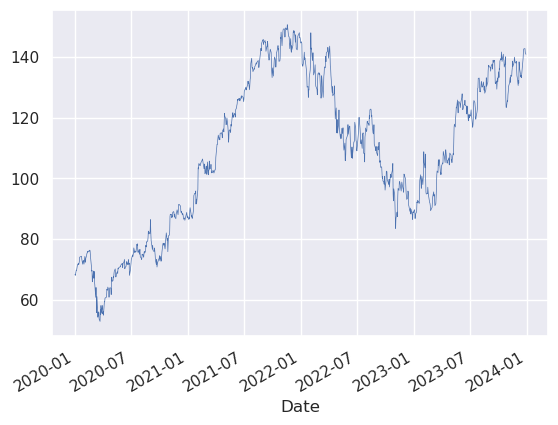

In [173]:
goog.plot(linewidth=0.5);

* `resample(freq).aggregate_func()` &rarr; data aggregation
* `asfreq(freq)` &rarr; data selection
   * $\approx$ `resample(freq).last()` 

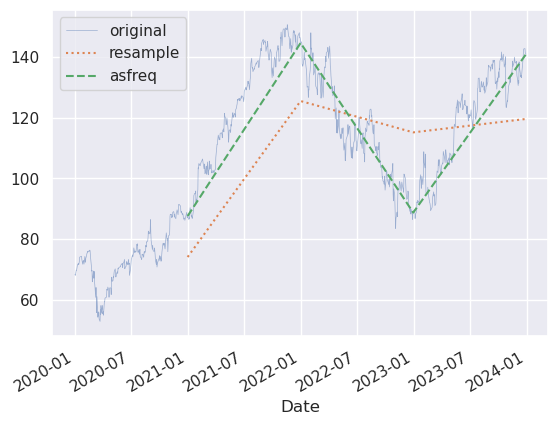

In [174]:
# 'BYE': Business Year End (last business day of year)
goog.plot(alpha=0.5, style='-', linewidth=0.5)
goog.resample('BYE').mean().plot(style=':') 
goog.asfreq('BYE').plot(style='--');
plt.legend(['original', 'resample', 'asfreq'], loc='upper left');

Resampling can generate Null values
* `method="ffill"|"bfill"` &rarr; how values are imputed

In [175]:
d = goog.head()
pprint("d" , "d.asfreq('D')", "d.asfreq('D',method='ffill')", align=True)

                           d = Date
                               2020-01-02    68.3685
                               2020-01-03    68.0330
                               2020-01-06    69.7105
                               2020-01-07    69.6670
                               2020-01-08    70.2160
                               Name: Close, dtype: float64
               d.asfreq('D') = Date
                               2020-01-02    68.3685
                               2020-01-03    68.0330
                               2020-01-04        NaN
                               2020-01-05        NaN
                               2020-01-06    69.7105
                               2020-01-07    69.6670
                               2020-01-08    70.2160
                               Freq: D, Name: Close, dtype: float64
d.asfreq('D',method='ffill') = Date
                               2020-01-02    68.3685
                               2020-01-03    68.0330
                       

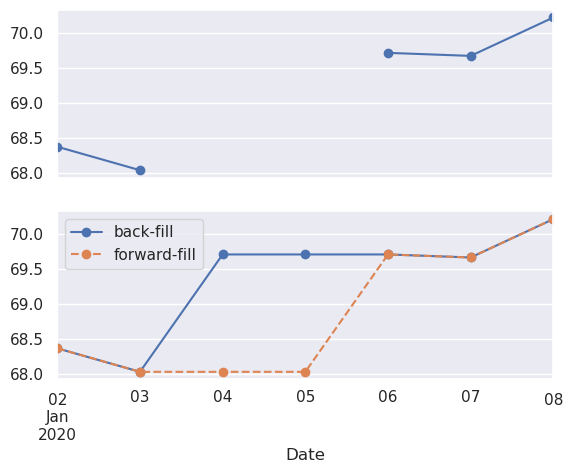

In [176]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.head()

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

* `shift()` &rarr; shift the data
   *  `shift(int)` &rarr; shift the data `int` positions
   *  `shift(int, freq)` &rarr; shift the data `int` number of `freq`

In [177]:
pprint("goog.head()", "goog.shift(3).head()", "goog.shift(3,'D').head()", align=True)

             goog.head() = Date
                           2020-01-02    68.3685
                           2020-01-03    68.0330
                           2020-01-06    69.7105
                           2020-01-07    69.6670
                           2020-01-08    70.2160
                           Name: Close, dtype: float64
    goog.shift(3).head() = Date
                           2020-01-02        NaN
                           2020-01-03        NaN
                           2020-01-06        NaN
                           2020-01-07    68.3685
                           2020-01-08    68.0330
                           Name: Close, dtype: float64
goog.shift(3,'D').head() = Date
                           2020-01-05    68.3685
                           2020-01-06    68.0330
                           2020-01-09    69.7105
                           2020-01-10    69.6670
                           2020-01-11    70.2160
                           Name: Close, dtype: float64


Compute differences over time (frequencies):

In [178]:
pprint("goog.head()", "goog.shift(-365,'D').head()", align=True)

                goog.head() = Date
                              2020-01-02    68.3685
                              2020-01-03    68.0330
                              2020-01-06    69.7105
                              2020-01-07    69.6670
                              2020-01-08    70.2160
                              Name: Close, dtype: float64
goog.shift(-365,'D').head() = Date
                              2019-01-02    68.3685
                              2019-01-03    68.0330
                              2019-01-06    69.7105
                              2019-01-07    69.6670
                              2019-01-08    70.2160
                              Name: Close, dtype: float64


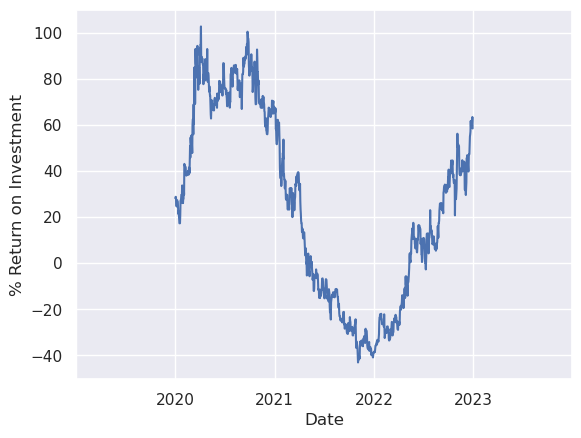

In [179]:
data = goog.asfreq('D', method='ffill')
ROI = 100 * (data.shift(-365,'D') / data - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

* `rolling()` &rarr; rolling window
   *  aggregation functions can be applied to a rolling window

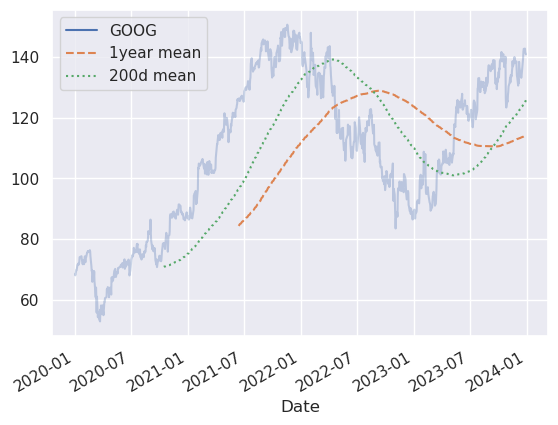

In [180]:
r365 = goog.rolling(365).mean()
r200 = goog.rolling(200).mean()
data = pd.DataFrame({'GOOG': goog, '1year mean': r365, '200d mean': r200})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)


In [181]:
pprint("goog.head()", "goog.shift(3).head()", "goog.shift(3,'D').head()", align=True)

             goog.head() = Date
                           2020-01-02    68.3685
                           2020-01-03    68.0330
                           2020-01-06    69.7105
                           2020-01-07    69.6670
                           2020-01-08    70.2160
                           Name: Close, dtype: float64
    goog.shift(3).head() = Date
                           2020-01-02        NaN
                           2020-01-03        NaN
                           2020-01-06        NaN
                           2020-01-07    68.3685
                           2020-01-08    68.0330
                           Name: Close, dtype: float64
goog.shift(3,'D').head() = Date
                           2020-01-05    68.3685
                           2020-01-06    68.0330
                           2020-01-09    69.7105
                           2020-01-10    69.6670
                           2020-01-11    70.2160
                           Name: Close, dtype: float64
